<a href="https://colab.research.google.com/github/peace1980/7072-Peace/blob/main/7072cem_coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# link for dataset:http://archive.ics.uci.edu/ml/machine-learning-databases/00544/
#Listing all the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/sample_data/ObesityDataSet.csv')
data



,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


Preprocessing stage

In [ ]:
# To encode all categorical variables present on my dataset columns
encode_variables = LabelEncoder()
categorical_columns = data.select_dtypes(include=['object']).columns
for objects in data:
  data[objects] = encode_variables.fit_transform(data[objects])
data.head()






,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,404,295,245,1,0,170,477,2,0,549,0,0,840,3,3,1
1,0,404,28,173,1,0,809,477,2,1,1267,1,1189,0,2,3,1
2,1,701,1306,382,1,0,170,477,2,0,549,0,1071,840,1,3,1
3,1,1021,1306,643,0,0,809,477,2,0,549,0,1071,0,1,4,5
4,1,578,1202,692,0,0,170,0,2,0,549,0,0,0,2,3,6


In [ ]:
data.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,646.025107,753.162956,641.452866,0.817622,0.883941,457.986736,388.715775,1.859308,0.020843,601.051161,0.045476,539.049266,482.125533,2.268593,2.365230,3.015632
std,0.500083,407.870050,453.399155,437.449707,0.386247,0.320371,295.226514,179.959492,0.468543,0.142893,391.006783,0.208395,407.078823,402.671537,0.515498,1.261423,1.952090
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,304.500000,364.000000,264.500000,1.000000,1.000000,170.000000,325.500000,2.000000,0.000000,312.500000,0.000000,112.500000,0.000000,2.000000,3.000000,1.000000
50%,1.000000,650.000000,711.000000,556.000000,1.000000,1.000000,421.000000,477.000000,2.000000,0.000000,549.000000,0.000000,589.000000,487.000000,2.000000,3.000000,3.000000
75%,1.000000,982.000000,1144.500000,1004.500000,1.000000,1.000000,809.000000,477.000000,2.000000,0.000000,905.500000,0.000000,919.500000,840.000000,3.000000,3.000000,5.000000
max,1.000000,1401.000000,1573.000000,1524.000000,1.000000,1.000000,809.000000,634.000000,3.000000,1.000000,1267.000000,1.000000,1189.000000,1128.000000,3.000000,4.000000,6.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Gender                          2111 non-null   int64
 1   Age                             2111 non-null   int64
 2   Height                          2111 non-null   int64
 3   Weight                          2111 non-null   int64
 4   family_history_with_overweight  2111 non-null   int64
 5   FAVC                            2111 non-null   int64
 6   FCVC                            2111 non-null   int64
 7   NCP                             2111 non-null   int64
 8   CAEC                            2111 non-null   int64
 9   SMOKE                           2111 non-null   int64
 10  CH2O                            2111 non-null   int64
 11  SCC                             2111 non-null   int64
 12  FAF                             2111 non-null   int64
 13  TUE

In [ ]:
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [ ]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [ ]:
#to fix missing values
data.fillna(data.mean(), inplace=True)

In [ ]:
# set X (training data) and y (target variable)
n_cols = data.shape[1]
X = data.iloc[:, : n_cols - 1] # X includes all rows and removes the last column, training data
y = data.iloc[:, n_cols - 1:]
print(X.shape)
print(y.shape)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


(2111, 16)
(2111, 1)


In [ ]:
# to check for imbalances
y_train['NObeyesdad'].value_counts()

2    273
4    261
6    240
3    239
5    234
1    225
0    216
Name: NObeyesdad, dtype: int64

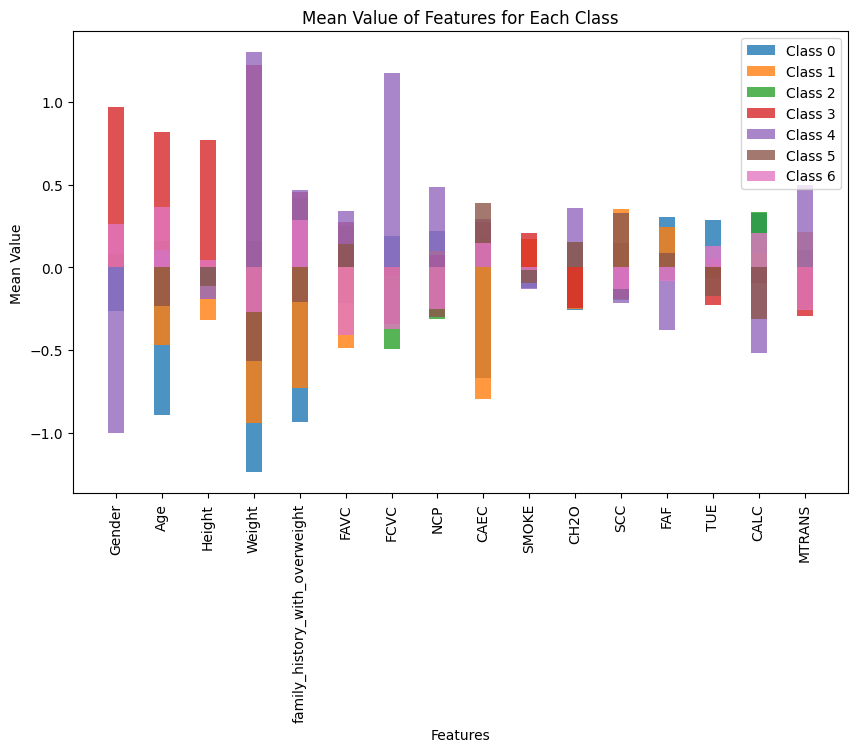

In [ ]:
import matplotlib.pyplot as plt

# Calculate the number of features
num_features = X_train_scaled.shape[1]
feature_names = X.columns.tolist()[:num_features]

# Calculate the mean value of each feature for both classes
class_means = [X_train_scaled[y_train.values.flatten() == i].mean(axis=0) for i in range(len(y_train['NObeyesdad'].value_counts()))]

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
index = range(num_features)
bar_width = 0.35
opacity = 0.8

for i, mean in enumerate(class_means):
    ax.bar(index, mean, bar_width, alpha=opacity, label=f'Class {i}')

ax.set_xlabel('Features')
ax.set_ylabel('Mean Value')
ax.set_title('Mean Value of Features for Each Class')
ax.set_xticks(index)
ax.set_xticklabels(feature_names, rotation=90)
ax.legend()


plt.show()


MODELLING STAGE

Decision Tree Accuracy: 0.9479905437352246
Decision Tree Precision: 0.9482643863147541
Decision Tree Recall: 0.9479905437352246
Decision Tree F1 Score: 0.9479942627387073


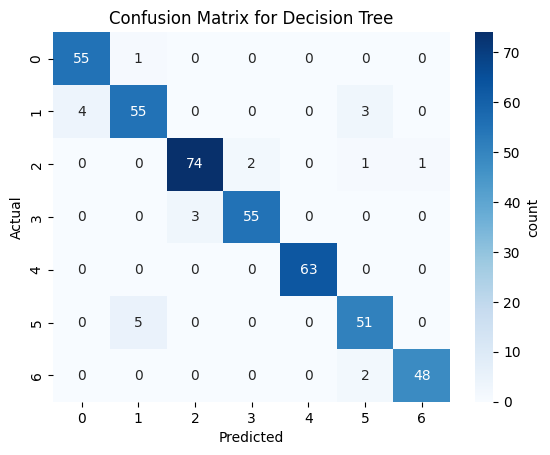

In [ ]:
#first classification techniques i used is decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Create a decision tree classifier
dt = DecisionTreeClassifier()

# Train the model
dt.fit(X_train_scaled, y_train)

# Make predictions on the test set
dt_predictions = dt.predict(X_test_scaled)

dt_accuracy = accuracy_score(y_test, dt_predictions)

dt_precision = precision_score(y_test, dt_predictions, average='weighted')
dt_recall = recall_score(y_test, dt_predictions, average='weighted')
dt_f1 = f1_score(y_test, dt_predictions, average='weighted')

print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Precision:", dt_precision)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree F1 Score:", dt_f1)

# to plot the decision tree confusion matrix
plt.figure()
ax =sns.heatmap(confusion_matrix(y_test, dt_predictions), annot=True, fmt='d', cmap='Blues',cbar_kws={'label': 'count'})
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


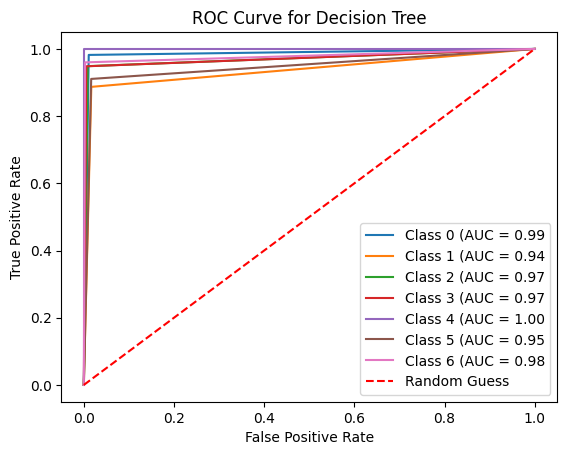

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute the predicted probabilities for each class
dt_probabilities = dt.predict_proba(X_test_scaled)

# Compute the false positive rate, true positive rate, and thresholds for each class
fpr = {}
tpr = {}
thresholds = {}
roc_auc = {}

# Compute ROC curve and AUC for each class
for i in range(len(dt.classes_)):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test, dt_probabilities[:, i], pos_label=dt.classes_[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure()
for i in range(len(dt.classes_)):
    plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f}'.format(dt.classes_[i],roc_auc[i]))

plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend()
plt.show()



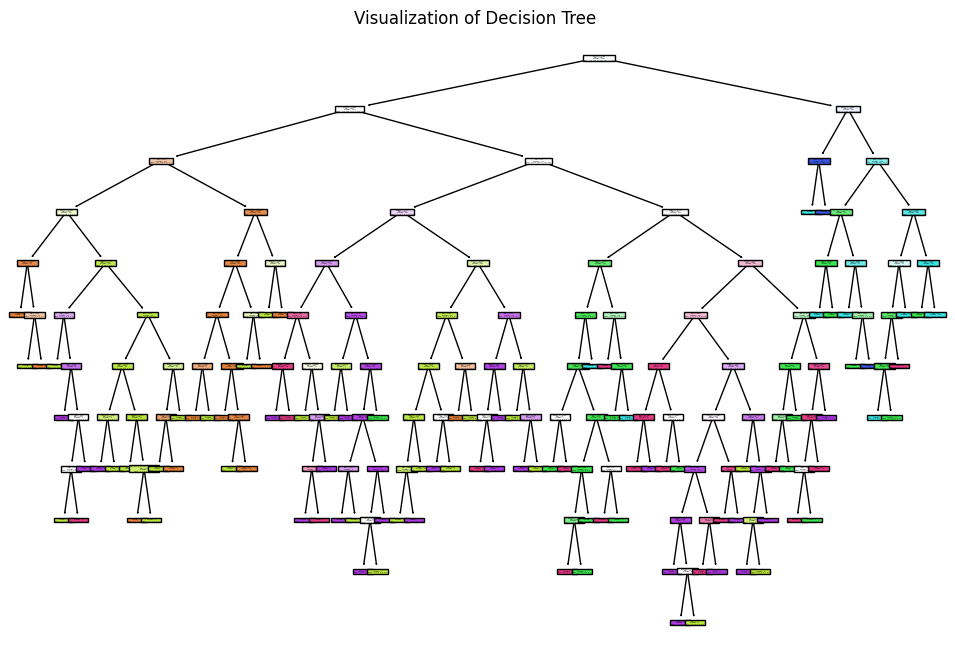

In [ ]:
# Decision Tree visualization
plt.figure(figsize=(12, 8))
plot_tree(dt, filled=True, feature_names=data.drop('NObeyesdad', axis=1).columns)
plt.title('Visualization of Decision Tree ')
plt.show()

In [ ]:
#second model is Random Forest Classifier
rf = RandomForestClassifier()

# Train the model
rf.fit(X_train_scaled, y_train)

# Make predictions on the test set
rf_predictions = rf.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest F1 Score:", rf_f1)

<ipython-input-15-95881e3fb43a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_scaled, y_train)


Random Forest Accuracy: 0.9598108747044918
Random Forest Precision: 0.9605758393662159
Random Forest Recall: 0.9598108747044918
Random Forest F1 Score: 0.9600466454372928


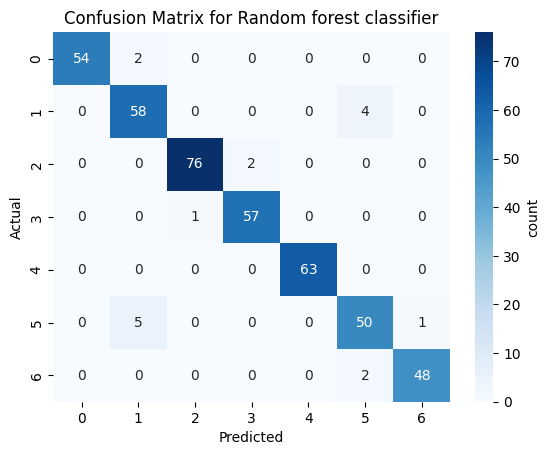

In [ ]:
# to plot the random forest classifier confusion matrix
plt.figure()
ax =sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt='d', cmap='Blues',cbar_kws={'label': 'count'})
plt.title('Confusion Matrix for Random forest classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<ipython-input-17-230d4f889149>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_scaled, y_train)


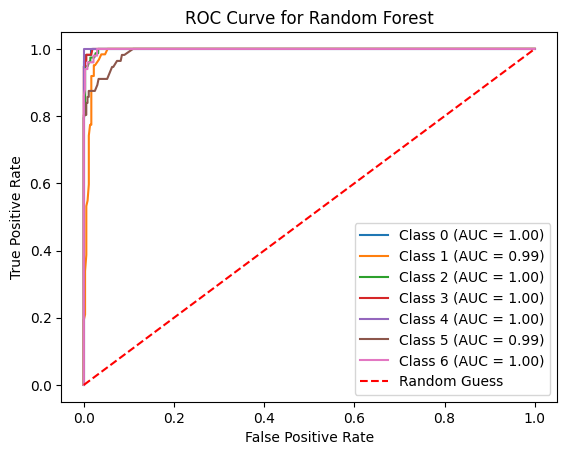

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Create a random forest classifier
rf = RandomForestClassifier()

# Train the model
rf.fit(X_train_scaled, y_train)

# Make predictions on the test set
rf_predictions = rf.predict(X_test_scaled)

# Calculate the predicted probabilities for each class
rf_probabilities = rf.predict_proba(X_test_scaled)

# Compute the false positive rate, true positive rate, and thresholds for each class
fpr = {}
tpr = {}
thresholds = {}
roc_auc = {}

# Compute ROC curve and AUC for each class
for i in range(len(rf.classes_)):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test, rf_probabilities[:, i], pos_label=rf.classes_[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure()
for i in range(len(rf.classes_)):
    plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(rf.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend()
plt.show()





In [ ]:
# Logistic Regression
lr = LogisticRegression()
# Train the model
lr.fit(X_train_scaled, y_train)

# Make predictions on the test set
lr_predictions = lr.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions, average='weighted')
lr_recall = recall_score(y_test, lr_predictions, average='weighted')
lr_f1 = f1_score(y_test, lr_predictions, average='weighted')

print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Precision:", lr_precision)
print("Logistic Regression Recall:", lr_recall)
print("Logistic Regression F1 Score:", lr_f1)


Logistic Regression Accuracy: 0.8628841607565012
Logistic Regression Precision: 0.8660003754441988
Logistic Regression Recall: 0.8628841607565012
Logistic Regression F1 Score: 0.8580521931211812


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


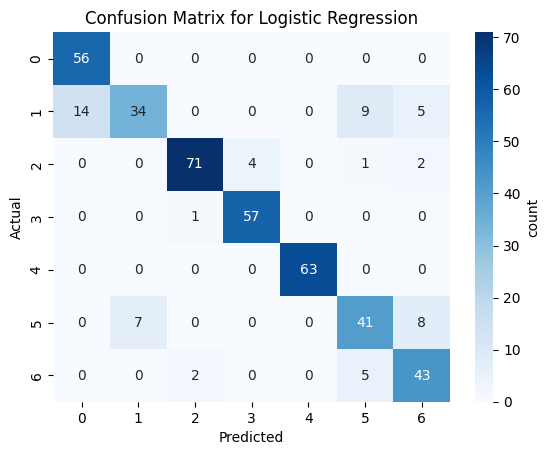

In [ ]:
# to plot the logistic regression confusion matrix
plt.figure()
ax =sns.heatmap(confusion_matrix(y_test, lr_predictions), annot=True, fmt='d', cmap='Blues',cbar_kws={'label': 'count'})
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


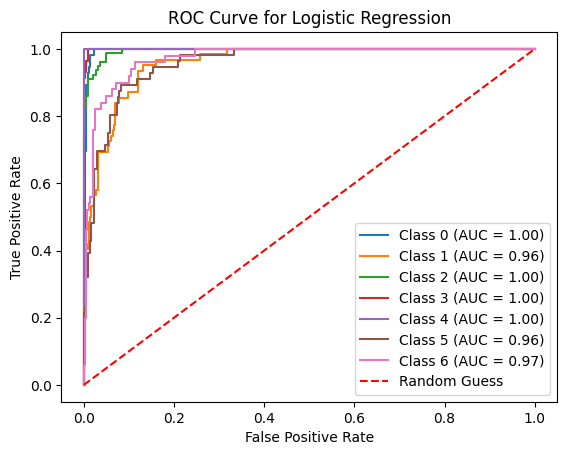

In [ ]:


# Create a logistic regression classifier
lr = LogisticRegression()

# Train the model
lr.fit(X_train_scaled, y_train)

# Make predictions on the test set
lr_predictions = lr.predict(X_test_scaled)

# Calculate the predicted probabilities for each class
lr_probabilities = lr.predict_proba(X_test_scaled)

# Compute the false positive rate, true positive rate, and thresholds for each class
fpr = {}
tpr = {}
thresholds = {}
roc_auc = {}

# Compute ROC curve and AUC for each class
for i in range(len(lr.classes_)):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test, lr_probabilities[:, i], pos_label=lr.classes_[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure()
for i in range(len(lr.classes_)):
    plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(lr.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()



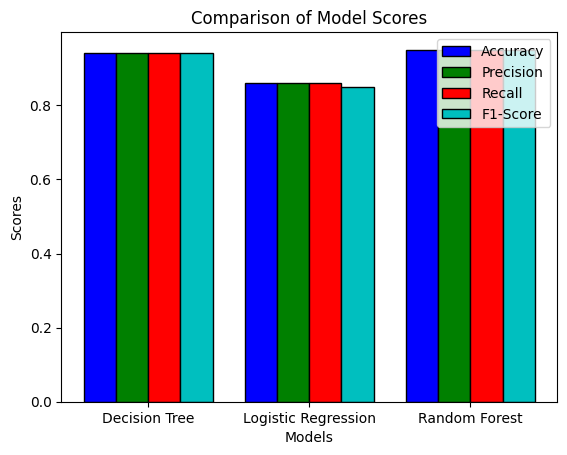

In [ ]:
import matplotlib.pyplot as plt

# to compare the models
model_names = ['Decision Tree', 'Logistic Regression', 'Random Forest']

# Model scores
accuracy_scores = [0.94, 0.86, 0.95]
precision_scores = [0.94, 0.86, 0.95]
recall_scores = [0.94, 0.86, 0.95]
f1_scores = [0.94, 0.85, 0.95]

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = range(len(model_names))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create the bar chart
plt.bar(r1, accuracy_scores, color='b', width=bar_width, edgecolor='black', label='Accuracy')
plt.bar(r2, precision_scores, color='g', width=bar_width, edgecolor='black', label='Precision')
plt.bar(r3, recall_scores, color='r', width=bar_width, edgecolor='black', label='Recall')
plt.bar(r4, f1_scores, color='c', width=bar_width, edgecolor='black', label='F1-Score')

# Add x-axis labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Model Scores')
plt.xticks([r + bar_width * 1.5 for r in range(len(model_names))], model_names)

# Add a legend
plt.legend()

# Show the bar chart
plt.show()
